In [1]:
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np

Dubai / 동 / 선박운임료 / 석탄의 경우 Bloomberg Terminal 활용하여 확보
코로나 관련 데이터는 깃허브의 csv파일로 확보
S&P Energy 가격은 Investing.com을 통해 csv파일로 확보하였다.
그 외의 데이터는 Pandas_datareader 와 FinanceDataReader를 통해 확보하였다.

# 데이터 합치기 및 확인(+EDA)

데이터 별 특징 정리:

2020년 코로나 데이터를 포함하는 데이터 = 코로나 / 비트코인

In [2]:
df_2008 = pd.read_csv('data/df_2008.csv')
df_2008

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,Dollar,Snp,Open,High,Low,Volume,Energy
0,2008-02-01,89.03,91.41,7.740,933.00,7230.0,6134.0,75.565,1395.42,537.15,544.62,534.29,238.36M,540.81
1,2008-02-04,90.07,91.09,7.869,899.50,7260.0,6121.0,75.470,1380.82,540.81,544.41,535.15,188.02M,541.30
2,2008-02-05,88.32,89.60,7.942,889.75,7130.0,6032.0,76.285,1336.64,541.29,541.29,521.00,243.54M,521.00
3,2008-02-06,87.16,88.73,7.994,892.00,7330.0,6002.0,76.300,1326.45,520.99,527.14,511.26,243.06M,512.79
4,2008-02-07,88.07,88.55,8.102,908.25,7540.0,6135.0,77.120,1336.91,512.10,523.59,507.85,234.50M,518.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,93.961,4438.23,427.19,433.94,427.19,167.51M,432.43
3339,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,93.938,4471.37,432.43,438.73,432.43,173.94M,434.44
3340,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,93.945,4486.48,434.44,441.08,432.57,217.66M,434.89
3341,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,93.728,4519.63,434.89,441.40,434.47,175.70M,439.87


In [3]:
df_2020 = pd.read_csv('data/df_2020.csv')
df_2020

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Open,High,Low,Volume,Energy
0,2020-01-02,61.17,67.05,2.122,1520.55,6188.0,976.0,0.0,0.0,96.525,6967.0,3257.85,456.46,460.93,456.46,133.61,460.34
1,2020-01-03,63.00,69.08,2.130,1547.40,6129.5,907.0,0.0,0.0,96.521,7343.1,3234.85,460.34,465.54,456.81,171.55,458.77
2,2020-01-06,63.27,70.25,2.135,1576.85,6138.5,844.0,0.0,0.0,96.350,7759.1,3246.28,458.77,464.81,458.77,195.33,462.34
3,2020-01-07,62.70,68.74,2.162,1566.50,6149.0,791.0,0.0,0.0,96.702,8155.7,3237.18,462.34,462.34,455.75,197.25,461.39
4,2020-01-08,59.65,67.31,2.141,1582.85,6178.0,773.0,0.0,0.0,96.996,8059.6,3253.05,461.39,461.39,452.84,187.23,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,1407791.0,63331126.0,93.961,57345.8,4438.23,427.19,433.94,427.19,167.51,432.43
437,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,1458486.0,68354252.0,93.938,61672.5,4471.37,432.43,438.73,432.43,173.94,434.44
438,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,1339231.0,69279898.0,93.945,62056.3,4486.48,434.44,441.08,432.57,217.66,434.89
439,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,1419351.0,79280514.0,93.728,64278.5,4519.63,434.89,441.40,434.47,175.70,439.87


## EDA 및 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_hm=df_2008.drop(['Open','High', 'Low'],axis=1)
df_hm.head()
df_hm_corr = df_hm.corr()
df_hm_corr

,WTI,Brent,Gas,Gold,Copper,Bdiy,Dollar,Snp,Energy
WTI,1.000000,0.971166,0.604269,-0.029669,0.657168,0.467595,-0.830272,-0.440995,0.630012
Brent,0.971166,1.000000,0.478414,0.101399,0.687422,0.335875,-0.801057,-0.418905,0.639576
Gas,0.604269,0.478414,1.000000,-0.466221,0.267487,0.839320,-0.604868,-0.392266,0.281012
Gold,-0.029669,0.101399,-0.466221,1.000000,0.497036,-0.302230,0.108119,0.521617,-0.250568
Copper,0.657168,0.687422,0.267487,0.497036,1.000000,0.336815,-0.534131,0.092887,0.222676
Bdiy,0.467595,0.335875,0.839320,-0.302230,0.336815,1.000000,-0.457353,-0.146624,0.034603
Dollar,-0.830272,-0.801057,-0.604868,0.108119,-0.534131,-0.457353,1.000000,0.674689,-0.327604
Snp,-0.440995,-0.418905,-0.392266,0.521617,0.092887,-0.146624,0.674689,1.000000,-0.299881
Energy,0.630012,0.639576,0.281012,-0.250568,0.222676,0.034603,-0.327604,-0.299881,1.000000


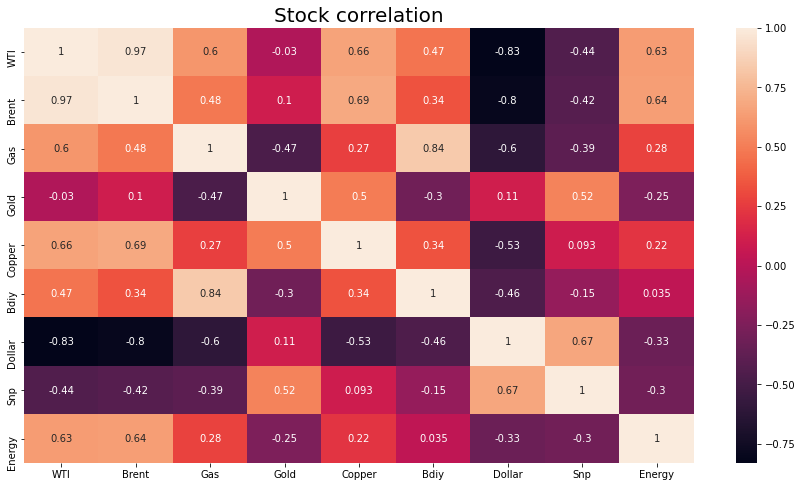

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [7]:
X= df_hm.index
y1= df_hm.WTI
y2= df_hm.Brent
y3= df_hm.Gas
y4= df_hm.Gold
y5= df_hm.Copper
y6= df_hm.Bdiy
y7= df_hm.Dollar
y8= df_hm.Snp
#y9= df_hm.Volume
y10= df_hm.Energy

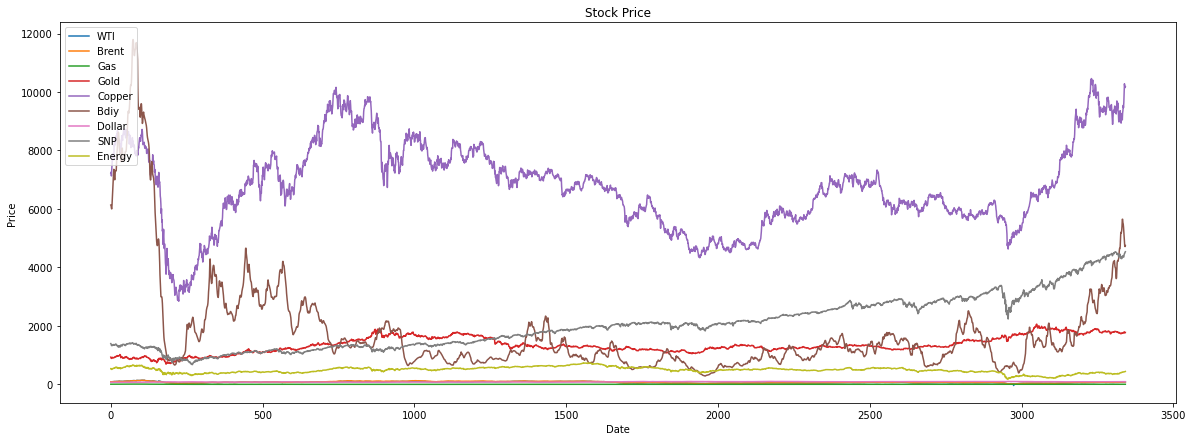

In [8]:
plt.figure(figsize=(20,7))
plt.plot(X, y1, label = 'WTI')
plt.plot(X, y2, label = 'Brent')
plt.plot(X, y3, label = 'Gas')
plt.plot(X, y4, label = 'Gold')
plt.plot(X, y5, label = 'Copper')
plt.plot(X, y6, label = 'Bdiy')
plt.plot(X, y7, label = 'Dollar')
plt.plot(X, y8, label = 'SNP')
plt.plot(X, y10, label = 'Energy')

plt.legend(loc='upper left')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [9]:
X = df_hm.iloc[:,1:-2]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2008['Energy']

In [10]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Energy   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.153e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:46:55   Log-Likelihood:                         -17814.
No. Observations:                3343   AIC:                                  3.564e+04
Df Residuals:                    3335   BIC:                                  3.569e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WTI            0.5366      0.217      2.475      0.013       0.111       0.962
Brent          4.1301      0.189     21.893      0.000       3.760       4.500
Gas            4.9295      1.148      4.293      0.000       2.678       7.181
Gold          -0.2326      0.006    -40.654      0.000      -0.244      -0.221
Copper         0.0005      0.001      0.413      0.679      -0.002       0.003
Bdiy          -0.0259      0.001    -24.722      0.000      -0.028      -0.024
Dollar         4.7623      0.065     72.747      0.000       4.634       4.891
Snp            0.0281      0.002     17.771      0.000       0.025       0.031
==============================================================================
Omnibus:                       52.260   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.619
Skew:                          -0.139   Prob(JB):                     6.96e-19
Kurtosis:                       3.723   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.1.2 2020년 데이터 시각화및 EDA

In [11]:
df_hm2=df_2020.drop(['Open','High', 'Low'],axis=1)
df_hm2.head()
df_hm2_corr = df_hm2.corr()
df_hm2_corr

,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Volume,Energy
WTI,1.000000,0.984433,0.745503,0.082865,0.869105,0.780071,0.532558,0.763553,-0.619955,0.779901,0.902560,-0.585771,0.814355
Brent,0.984433,1.000000,0.734564,0.047469,0.861840,0.768435,0.515337,0.753807,-0.606086,0.777471,0.899252,-0.597893,0.849026
Gas,0.745503,0.734564,1.000000,0.229528,0.758351,0.905673,0.580421,0.722840,-0.495727,0.681087,0.832766,-0.363991,0.445904
Gold,0.082865,0.047469,0.229528,1.000000,0.324910,0.246209,0.496333,0.102934,-0.664483,0.121812,0.320992,-0.238186,-0.309111
Copper,0.869105,0.861840,0.758351,0.324910,1.000000,0.823721,0.784903,0.819451,-0.803671,0.900127,0.956149,-0.499724,0.603437
Bdiy,0.780071,0.768435,0.905673,0.246209,0.823721,1.000000,0.590796,0.814953,-0.502319,0.743473,0.854910,-0.414132,0.491437
new_cases,0.532558,0.515337,0.580421,0.496333,0.784903,0.590796,1.000000,0.519085,-0.806197,0.737872,0.758695,-0.360164,0.170053
vaccination,0.763553,0.753807,0.722840,0.102934,0.819451,0.814953,0.519085,1.000000,-0.449064,0.683180,0.828389,-0.400834,0.595167
Dollar,-0.619955,-0.606086,-0.495727,-0.664483,-0.803671,-0.502319,-0.806197,-0.449064,1.000000,-0.657765,-0.759431,0.430750,-0.268707
Bitcoin,0.779901,0.777471,0.681087,0.121812,0.900127,0.743473,0.737872,0.683180,-0.657765,1.000000,0.853450,-0.396084,0.586202


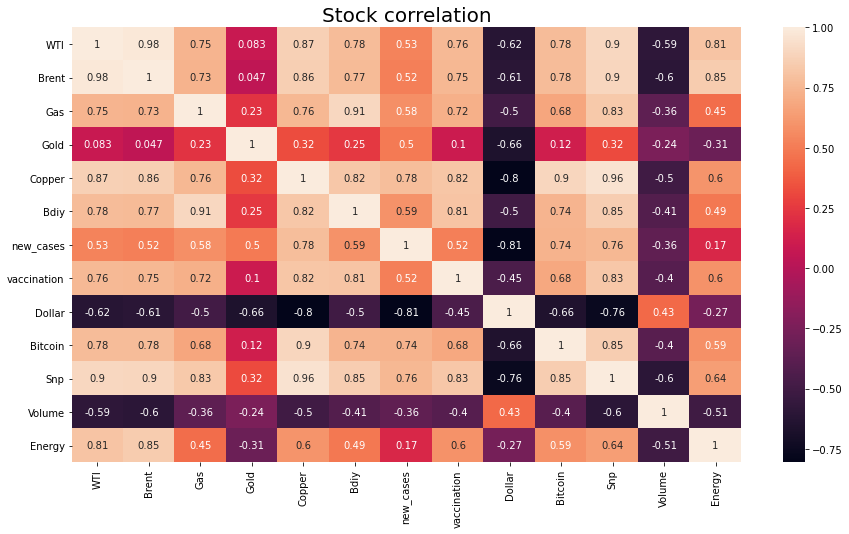

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm2_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [13]:
X = df_hm2.iloc[:,1:-1]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2020['Energy']

In [14]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Energy   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              9468.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:47:00   Log-Likelihood:                         -1959.4
No. Observations:                 441   AIC:                                      3943.
Df Residuals:                     429   BIC:                                      3992.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WTI            -0.6376      0.352     -1.811      0.071      -1.329       0.054
Brent           3.4791      0.398      8.750      0.000       2.698       4.261
Gas           -15.6673      2.881     -5.437      0.000     -21.331     -10.004
Gold           -0.1541      0.016     -9.694      0.000      -0.185      -0.123
Copper          0.0080      0.003      2.417      0.016       0.001       0.015
Bdiy           -0.0094      0.002     -3.774      0.000      -0.014      -0.004
new_cases   -2.714e-05   2.96e-06     -9.182      0.000    -3.3e-05   -2.13e-05
vaccination -7.301e-08   5.82e-08     -1.255      0.210   -1.87e-07    4.14e-08
Dollar          2.5634      0.216     11.871      0.000       2.139       2.988
Bitcoin      7.053e-05      0.000      0.419      0.676      -0.000       0.000
Snp             0.0679      0.012      5.697      0.000       0.044       0.091
Volume         -0.0252      0.015     -1.714      0.087      -0.054       0.004
==============================================================================
Omnibus:                        2.937   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                3.217
Skew:                          -0.034   Prob(JB):                        0.200
Kurtosis:                       3.413   Cond. No.                     1.64e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection
- 과도한 상관관계 / 또는 높은 설명력을 가진 변수의 경우 제외하기로 결정하였다
    Crewd Oil 값은 우선 제거하여 돌려보기로 하였다.(이 값은 조금 생각해 보고)
- Copper의 경우 회귀분석에 있어서 너무 높은 pvalue를 보여 우선적으로 탈락

In [15]:
X1 = df_2008[['WTI','Gas','Gold','Bdiy','Dollar','Snp']]
y1 = df_2008['Energy']

In [16]:
X2 = df_2020.drop(['Date','Brent','Copper'], axis =1)
y2 = df_2020['Energy']

Train/Test Split

In [34]:
from sklearn.model_selection import TimeSeriesSplit

X1 = np.array(X1)
y1 = np.array(y1)

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=0,
    max_train_size=1500,
    test_size=100,
)
all_splits = list(ts_cv.split(X1, y1))
train_0, test_0 = all_splits[0]
train_1, test_1 = all_splits[1]
train_2, test_2 = all_splits[2]
train_3, test_3 = all_splits[3]
train_4, test_4 = all_splits[4]

In [35]:
# 시각화
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

cmap_data = plt.cm.Paired 
cmap_cv = plt.cm.coolwarm 
plt.style.use('fivethirtyeight')

def plot_cv_indices(cv, X, n_splits, lw=10): 
  fig, ax = plt.subplots() 
  """Create a sample plot for indices of a cross-validation object.""" 
  
  # Generate the training/testing visualizations for each CV split 
  for ii, (tr, tt) in enumerate(cv.split(X=X)): 
    # Fill in indices with the training/test groups 
    indices = np.array([np.nan] * len(X)) 
    indices[tt] = 1 
    indices[tr] = 0 
    
    # Visualize the results 
    ax.scatter(range(len(indices)), [ii + .5] * len(indices),
               c=indices, marker='_', lw=lw, cmap=cmap_cv, 
               vmin=-.2, vmax=1.2) 
    # Formatting 
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels, 
           xlabel='Sample index', ylabel="CV iteration", 
           ylim=[n_splits+0.1, -.1], xlim=[0, len(X)]) 
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15) 
    
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))], 
              ['Testing set', 'Training set'], loc=(1.02, .8))


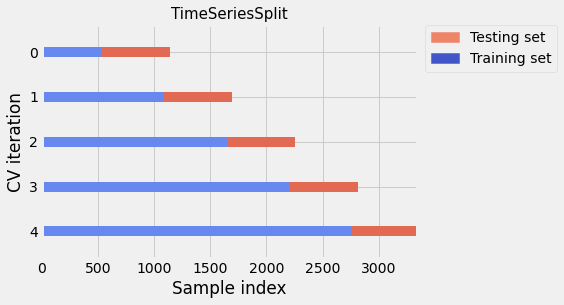

In [36]:
n_split= 5
tscv= TimeSeriesSplit(n_splits=n_split)
plot_cv_indices(tscv, X1, n_splits=n_split)

## 2020년의 경우

In [20]:
# X2 = np.array(X2)
# y2 = np.array(y2)
# ##  2020년 데이터는 단순하게 1번만 돌리도록 수정
# ts_cv = TimeSeriesSplit(
#     n_splits=3,
#     gap=0,
#     max_train_size=3000,
#     test_size=100,
# )
# all_splits = list(ts_cv.split(X2, y2))
# train_0, test_0 = all_splits[0]
# train_1, test_1 = all_splits[1]
# train_2, test_2 = all_splits[2]

In [21]:
train2020 = df_2020.loc[df_2020.Date < '2021-07-01',:]
test2020 = df_2020.loc[df_2020.Date >= '2021-07-01',:]
X2_train = np.array(train2020.drop(['Date','Brent','Energy'],axis =1))
y2_train = np.array(train2020.Energy)
X2_test = np.array(test2020.drop(['Date','Brent','Energy'],axis =1))
y2_test = np.array(test2020.Energy)


In [37]:
X2_test.shape

(77, 14)

# LSTM

In [38]:
from sklearn.preprocessing import MinMaxScaler
def Scaler(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    trainX = scaler.transform(X)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    # LSTM 을 위한 reshape
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    ty = trainy
    return tX, ty, scaler

In [39]:
tX1, ty1, scaler1 = Scaler(X1,y1)

In [40]:
# tX2, ty2, sacler2 = Scaler(X2,y2)

In [41]:
tX2_train, ty2_train, scaler3 = Scaler(X2_train, y2_train)

In [42]:
tX2_test, ty2_test, scaler4 = Scaler(X2_test, y2_test)

In [47]:
tX1[train_4].shape

(1500, 6, 1)

In [48]:
tX2_test.shape

(77, 14, 1)

3개의 train 구분에 대하여 각각의 모델 적용 하는 함수를 작성해야 한다.

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
def model_build(x,y):
    tf.random.set_seed(1)
    model = Sequential()
    model.add(LSTM(16, 
                   input_shape=(x,y), 
                   activation='tanh', 
                   return_sequences=True)
              )
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh'))
    model.add(Dense(1))

    model.summary()
    return model

In [50]:
def Train(xtrain,ytrain,xtest,ytest,number):
    model = model_build(xtrain.shape[1],xtrain.shape[2])
    model.compile(loss='mae' , optimizer='adam')
    earlyStopping = EarlyStopping(min_delta=0.001, monitor = 'loss', patience = 100, restore_best_weights = True)
    modelCheckPoint = ModelCheckpoint(filepath = f'best_model_{number}.h5', monitor = 'val_loss')
    
    hist = model.fit(xtrain, ytrain ,epochs=1000,validation_data=(xtest,ytest ), batch_size = 100, callbacks = [earlyStopping, modelCheckPoint] )
    
    #graph
    yhat = model.predict(xtest)
    print(f'mse evaluate : {np.average(yhat-ytest)}')
    print(yhat.shape,ytest.shape)

    plt.plot(yhat, label="LSTM")
    plt.plot(ytest, label="real")
    plt.legend()
    return yhat, ytest

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 16)             1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 16)             2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, 6, 16)             2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
15/15 [==============================] - 8s 140ms/step - loss: 0.5845 - val_loss: 0.2989
Epoch 2/1000
15/15

15/15 [==============================] - 0s 14ms/step - loss: 0.0550 - val_loss: 0.1540
Epoch 72/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0552 - val_loss: 0.1664
Epoch 73/1000
15/15 [==============================] - 0s 21ms/step - loss: 0.0543 - val_loss: 0.1535
Epoch 74/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0555 - val_loss: 0.1106
Epoch 75/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.1204
Epoch 76/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.1263
Epoch 77/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0532 - val_loss: 0.1360
Epoch 78/1000
15/15 [==============================] - 0s 18ms/step - loss: 0.0526 - val_loss: 0.1331
Epoch 79/1000
15/15 [==============================] - 0s 18ms/step - loss: 0.0529 - val_loss: 0.1175
Epoch 80/1000
15/15 [==============================] - 0s 18ms/step - loss: 0.0538 - val_loss: 0

Epoch 151/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0462 - val_loss: 0.0508
Epoch 152/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0455 - val_loss: 0.0566
Epoch 153/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0463 - val_loss: 0.0440
Epoch 154/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0454 - val_loss: 0.0393
Epoch 155/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0453 - val_loss: 0.0414
Epoch 156/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0456 - val_loss: 0.0359
Epoch 157/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0452 - val_loss: 0.0420
Epoch 158/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0457 - val_loss: 0.0428
Epoch 159/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0453 - val_loss: 0.0513
Epoch 160/1000
15/15 [==============================] - 0s 18ms/step - lo

15/15 [==============================] - 0s 17ms/step - loss: 0.0423 - val_loss: 0.0376
Epoch 231/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0425 - val_loss: 0.0281
Epoch 232/1000
15/15 [==============================] - ETA: 0s - loss: 0.043 - 0s 14ms/step - loss: 0.0439 - val_loss: 0.0586
Epoch 233/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0440 - val_loss: 0.0249
Epoch 234/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0423 - val_loss: 0.0289
Epoch 235/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0421 - val_loss: 0.0277
Epoch 236/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0423 - val_loss: 0.0345
Epoch 237/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0421 - val_loss: 0.0316
Epoch 238/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0431 - val_loss: 0.0338
Epoch 239/1000
15/15 [==============================] - 0s 14ms/

15/15 [==============================] - 0s 15ms/step - loss: 0.0415 - val_loss: 0.0278
Epoch 310/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0419 - val_loss: 0.0351
Epoch 311/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0414 - val_loss: 0.0384
Epoch 312/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0421 - val_loss: 0.0302
Epoch 313/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0414 - val_loss: 0.0279
Epoch 314/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0421 - val_loss: 0.0387
Epoch 315/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0415 - val_loss: 0.0342
Epoch 316/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0413 - val_loss: 0.0328
Epoch 317/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0418 - val_loss: 0.0268
Epoch 318/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0424 - va

15/15 [==============================] - 0s 20ms/step - loss: 0.0409 - val_loss: 0.0309
Epoch 389/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0413 - val_loss: 0.0385
Epoch 390/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0410 - val_loss: 0.0262
Epoch 391/1000
15/15 [==============================] - 0s 19ms/step - loss: 0.0417 - val_loss: 0.0301
Epoch 392/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 393/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0340
Epoch 394/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0414 - val_loss: 0.0327
Epoch 395/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0412 - val_loss: 0.0405
Epoch 396/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0301
Epoch 397/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0413 - va

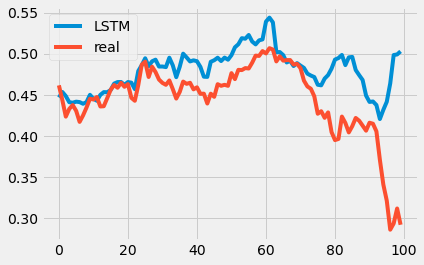

In [51]:
yhat1, ytest1 = Train(tX1[train_0],ty1[train_0], tX1[test_0],ty1[test_0],1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 6, 16)             1152      
_________________________________________________________________
lstm_5 (LSTM)                (None, 6, 16)             2112      
_________________________________________________________________
lstm_6 (LSTM)                (None, 6, 16)             2112      
_________________________________________________________________
lstm_7 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
15/15 [==============================] - 9s 140ms/step - loss: 0.5617 - val_loss: 0.0534
Epoch 2/1000
15/

15/15 [==============================] - 0s 15ms/step - loss: 0.0416 - val_loss: 0.2676
Epoch 71/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0433 - val_loss: 0.2411
Epoch 72/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0407 - val_loss: 0.2455
Epoch 73/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0413 - val_loss: 0.2622
Epoch 74/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0410 - val_loss: 0.2374
Epoch 75/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0422 - val_loss: 0.2548
Epoch 76/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0412 - val_loss: 0.2580
Epoch 77/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.2550
Epoch 78/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0414 - val_loss: 0.2535
Epoch 79/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0418 - val_loss: 0

Epoch 150/1000
15/15 [==============================] - 0s 23ms/step - loss: 0.0388 - val_loss: 0.2424
Epoch 151/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0389 - val_loss: 0.2434
Epoch 152/1000
15/15 [==============================] - 0s 20ms/step - loss: 0.0387 - val_loss: 0.2527
Epoch 153/1000
15/15 [==============================] - 0s 20ms/step - loss: 0.0385 - val_loss: 0.2446
Epoch 154/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.2330
Epoch 155/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0395 - val_loss: 0.2314
Epoch 156/1000
15/15 [==============================] - 0s 19ms/step - loss: 0.0393 - val_loss: 0.2366
Epoch 157/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0390 - val_loss: 0.2397
Epoch 158/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0402 - val_loss: 0.2280
Epoch 159/1000
15/15 [==============================] - 0s 17ms/step - lo

15/15 [==============================] - 0s 18ms/step - loss: 0.0386 - val_loss: 0.2417
Epoch 230/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0384 - val_loss: 0.2239
Epoch 231/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0378 - val_loss: 0.2336
Epoch 232/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0387 - val_loss: 0.2419
Epoch 233/1000
15/15 [==============================] - 0s 19ms/step - loss: 0.0380 - val_loss: 0.2441
Epoch 234/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0379 - val_loss: 0.2289
Epoch 235/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0381 - val_loss: 0.2351
Epoch 236/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0386 - val_loss: 0.2404
Epoch 237/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0386 - val_loss: 0.2498
Epoch 238/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0384 - va

15/15 [==============================] - 0s 13ms/step - loss: 0.0378 - val_loss: 0.2404
Epoch 309/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0374 - val_loss: 0.2427
Epoch 310/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.2400
Epoch 311/1000
15/15 [==============================] - 0s 20ms/step - loss: 0.0398 - val_loss: 0.2260
Epoch 312/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0378 - val_loss: 0.2220
Epoch 313/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0392 - val_loss: 0.2283
Epoch 314/1000
15/15 [==============================] - 0s 19ms/step - loss: 0.0386 - val_loss: 0.2295
Epoch 315/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.2406
Epoch 316/1000
15/15 [==============================] - 0s 18ms/step - loss: 0.0384 - val_loss: 0.2437
Epoch 317/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0399 - va

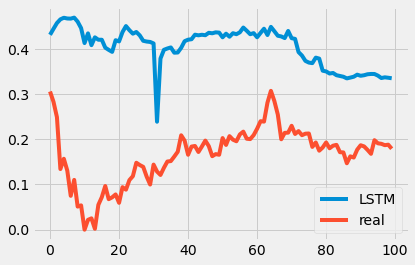

In [91]:
yhat2, ytest2 = Train(tX1[train_1],ty1[train_1], tX1[test_1],ty1[test_1],2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 6, 16)             1152      
_________________________________________________________________
lstm_9 (LSTM)                (None, 6, 16)             2112      
_________________________________________________________________
lstm_10 (LSTM)               (None, 6, 16)             2112      
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
15/15 [==============================] - 8s 134ms/step - loss: 0.5175 - val_loss: 0.0435
Epoch 2/1000
15/

15/15 [==============================] - 0s 16ms/step - loss: 0.0469 - val_loss: 0.1553
Epoch 72/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0477 - val_loss: 0.1552
Epoch 73/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0453 - val_loss: 0.1637
Epoch 74/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0462 - val_loss: 0.1497
Epoch 75/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.0458 - val_loss: 0.1501
Epoch 76/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0443 - val_loss: 0.1569
Epoch 77/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0446 - val_loss: 0.1734
Epoch 78/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0440 - val_loss: 0.1547
Epoch 79/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0437 - val_loss: 0.1461
Epoch 80/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0432 - val_loss: 0

Epoch 151/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0390 - val_loss: 0.1407
Epoch 152/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0403 - val_loss: 0.1517
Epoch 153/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0398 - val_loss: 0.1576
Epoch 154/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.1673
Epoch 155/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.1494
Epoch 156/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.0376 - val_loss: 0.1395
Epoch 157/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0389 - val_loss: 0.1395
Epoch 158/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.1580
Epoch 159/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0388 - val_loss: 0.1557
Epoch 160/1000
15/15 [==============================] - 0s 16ms/step - lo

15/15 [==============================] - 0s 16ms/step - loss: 0.0395 - val_loss: 0.1598
Epoch 231/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0388 - val_loss: 0.1590
Epoch 232/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0377 - val_loss: 0.1419
Epoch 233/1000
15/15 [==============================] - 0s 18ms/step - loss: 0.0383 - val_loss: 0.1426
Epoch 234/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.1575
Epoch 235/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.1443
Epoch 236/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0370 - val_loss: 0.1462
Epoch 237/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.1420
Epoch 238/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.0373 - val_loss: 0.1492
Epoch 239/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.0376 - va

15/15 [==============================] - 0s 14ms/step - loss: 0.0370 - val_loss: 0.1422
Epoch 310/1000
15/15 [==============================] - 0s 28ms/step - loss: 0.0369 - val_loss: 0.1564
Epoch 311/1000
15/15 [==============================] - 0s 29ms/step - loss: 0.0368 - val_loss: 0.1362
Epoch 312/1000
15/15 [==============================] - 1s 40ms/step - loss: 0.0371 - val_loss: 0.1547
Epoch 313/1000
15/15 [==============================] - 0s 23ms/step - loss: 0.0397 - val_loss: 0.1665
Epoch 314/1000
15/15 [==============================] - 1s 68ms/step - loss: 0.0406 - val_loss: 0.1673
Epoch 315/1000
15/15 [==============================] - 0s 23ms/step - loss: 0.0390 - val_loss: 0.1603
Epoch 316/1000
15/15 [==============================] - 1s 36ms/step - loss: 0.0377 - val_loss: 0.1455
Epoch 317/1000
15/15 [==============================] - 0s 23ms/step - loss: 0.0367 - val_loss: 0.1414
Epoch 318/1000
15/15 [==============================] - 0s 25ms/step - loss: 0.0368 - va

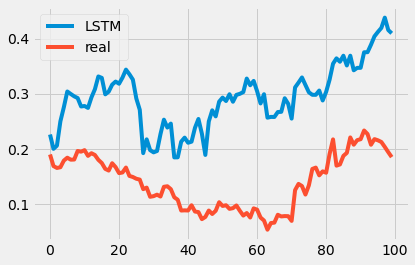

In [92]:
yhat3, ytest3 =Train(tX1[train_2],ty1[train_2], tX1[test_2],ty1[test_2],3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 14, 16)            1152      
_________________________________________________________________
lstm_13 (LSTM)               (None, 14, 16)            2112      
_________________________________________________________________
lstm_14 (LSTM)               (None, 14, 16)            2112      
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 10s 730ms/step - loss: 0.4650 - val_loss: 0.3459
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0362 - val_loss: 0.1322
Epoch 74/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.0362 - val_loss: 0.1149
Epoch 75/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0349 - val_loss: 0.1276
Epoch 76/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0337 - val_loss: 0.1200
Epoch 77/1000
4/4 [==============================] - 0s 57ms/step - loss: 0.0330 - val_loss: 0.1106
Epoch 78/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0321 - val_loss: 0.1047
Epoch 79/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0318 - val_loss: 0.1115
Epoch 80/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0311 - val_loss: 0.1039
Epoch 81/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0307 - val_loss: 0.0929
Epoch 82/1000
4/4 [==============================] - 0s 62ms/step - loss: 0.0304 - val_loss: 0.0914


4/4 [==============================] - 0s 48ms/step - loss: 0.0214 - val_loss: 0.0533
Epoch 155/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0205 - val_loss: 0.0527
Epoch 156/1000
4/4 [==============================] - 0s 57ms/step - loss: 0.0212 - val_loss: 0.0511
Epoch 157/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0201 - val_loss: 0.0509
Epoch 158/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.0223 - val_loss: 0.0550
Epoch 159/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0231 - val_loss: 0.0515
Epoch 160/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0217 - val_loss: 0.0531
Epoch 161/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0207 - val_loss: 0.0519
Epoch 162/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0200 - val_loss: 0.0512
Epoch 163/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0183 - val_loss: 0.0512
Epoch

4/4 [==============================] - 0s 43ms/step - loss: 0.0220 - val_loss: 0.0528
Epoch 236/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0242 - val_loss: 0.0507
Epoch 237/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0224 - val_loss: 0.0555
Epoch 238/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0228 - val_loss: 0.0507
Epoch 239/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0211 - val_loss: 0.0509
Epoch 240/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0192 - val_loss: 0.0515
Epoch 241/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0188 - val_loss: 0.0506
Epoch 242/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0182 - val_loss: 0.0497
Epoch 243/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0179 - val_loss: 0.0495
Epoch 244/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0174 - val_loss: 0.0499
Epoch

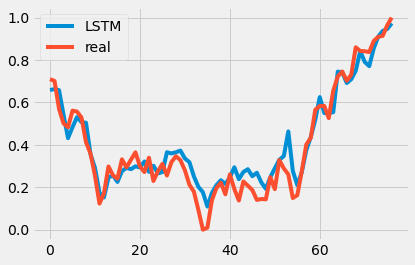

In [93]:
yhat4, ytest4 =Train(tX2_train, ty2_train, tX2_test,ty2_test,4)

In [ ]:
#inverse scaler
scaler.inverse_transform(yhat)

# S&P500 Energy 섹터 소속 5개 회사
### 파마 프랜치 모델의 적용과 비교를 위해 주요 5개 회사를 선정, LSTM모델과의 성능 ( 수익률)차이를 계산해 보도록 하겠다

In [52]:
### ExxonMobil 불러오기

df_XOM = fdr.DataReader('XOM', '2008-01-01', '2021-10-21')
df_XOM

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.51,94.15,94.55,92.78,23350000.0,-0.0019
2008-01-03,93.83,93.86,94.74,93.51,19170000.0,0.0034
2008-01-04,92.08,93.24,94.36,91.88,24730000.0,-0.0187
2008-01-07,91.22,92.50,93.15,90.25,28940000.0,-0.0093
2008-01-08,90.05,91.86,92.05,89.68,21760000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,62.59,62.73,63.07,62.44,16090000.0,0.0095
2021-10-18,62.56,63.09,63.14,62.27,18270000.0,-0.0005
2021-10-19,63.50,62.87,63.61,62.67,18930000.0,0.0150


In [53]:
### Chevron Corporation 불러오기

df_CVX = fdr.DataReader('CVX', '2008-01-01', '2021-10-21')
df_CVX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.46,93.96,94.69,92.71,9060000.0,0.0014
2008-01-03,94.61,93.80,94.84,93.46,10480000.0,0.0123
2008-01-04,93.35,93.88,95.21,93.20,13100000.0,-0.0133
2008-01-07,92.13,93.74,93.74,91.15,12890000.0,-0.0131
2008-01-08,90.95,92.41,93.38,90.58,10990000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,109.61,109.77,110.03,109.43,9970000.0,0.0074
2021-10-18,109.56,110.22,110.41,108.96,10500000.0,-0.0005
2021-10-19,111.70,110.16,111.70,109.79,10360000.0,0.0195


In [54]:
### ConocoPhillips 불러오기

df_COP = fdr.DataReader('COP', '2008-01-01', '2021-10-21')
df_COP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,67.00,67.66,68.39,66.22,11500000.0,-0.0046
2008-01-03,67.27,67.09,67.88,67.09,8590000.0,0.0040
2008-01-04,65.22,66.38,66.94,65.10,11120000.0,-0.0305
2008-01-07,64.33,65.75,65.93,63.87,13550000.0,-0.0136
2008-01-08,62.90,64.68,65.26,62.72,12370000.0,-0.0222
...,...,...,...,...,...,...
2021-10-15,74.14,74.63,74.93,74.13,6950000.0,0.0039
2021-10-18,74.50,74.77,75.75,74.13,9910000.0,0.0049
2021-10-19,75.32,74.84,75.85,74.38,6590000.0,0.0110


In [55]:
### Marathon Oil 불러오기

df_MRO = fdr.DataReader('MRO', '2008-01-01', '2021-10-21')
df_MRO

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,37.27,37.03,37.61,37.03,5690000.0,0.0087
2008-01-03,37.56,37.47,38.38,37.03,4800000.0,0.0078
2008-01-04,36.16,37.24,37.24,36.09,5970000.0,-0.0373
2008-01-07,35.79,36.11,36.58,35.42,7500000.0,-0.0102
2008-01-08,35.56,36.38,36.78,35.43,8520000.0,-0.0064
...,...,...,...,...,...,...
2021-10-15,16.18,16.42,16.53,16.16,12690000.0,0.0025
2021-10-18,16.43,16.48,16.84,16.24,25240000.0,0.0155
2021-10-19,16.39,16.46,16.62,16.27,18510000.0,-0.0024


In [56]:
### Kinder Morgan 불러오기

df_KMI = fdr.DataReader('KMI', '2008-01-01', '2021-10-21')
df_KMI

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2011-02-14,30.70,31.05,31.30,30.70,6280000.0,-0.0113
2011-02-15,30.94,30.90,31.15,30.73,4340000.0,0.0078
2011-02-16,30.72,31.05,31.44,30.66,4630000.0,-0.0071
2011-02-17,30.55,30.68,31.09,30.51,3290000.0,-0.0055
2011-02-18,31.37,30.65,31.39,30.40,6940000.0,0.0268
...,...,...,...,...,...,...
2021-10-15,18.46,18.44,18.61,18.39,12250000.0,0.0044
2021-10-18,18.47,18.56,18.76,18.35,15530000.0,0.0005
2021-10-19,18.45,18.56,18.61,18.34,10010000.0,-0.0011


# 파마 프렌치 모델

In [57]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff
import statsmodels.api as smf

In [58]:
test_ff = ff.get_available_datasets()

In [59]:
df_12_industry = [test_fff for test_fff in test_ff if '12_Industry_Portfolios' in test_fff and 'Industry_Portfolios' in test_fff]

In [60]:
ds_industry = web.DataReader(df_12_industry[2],'famafrench', start='2008-01-01', end='2021-10-21')
print(ds_industry)

{0:             NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Date                                                                        
2008-01-02  -1.22  -2.13  -1.76   0.50  -1.13  -1.95  -1.53  -1.10  -1.80   
2008-01-03   0.60  -0.92   0.43   0.36   0.27  -0.18  -0.13   0.19  -1.77   
2008-01-04  -1.10  -3.64  -2.96  -2.41  -1.52  -4.18  -1.99  -0.22  -2.52   
2008-01-07   1.98   0.17  -1.37  -1.00   0.12  -0.93   0.59   1.79   1.05   
2008-01-08  -0.13  -2.62  -2.42  -1.52  -1.04  -2.62  -2.65  -0.14  -1.94   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-09-24  -0.24   1.71  -0.64   0.79  -0.23   0.14  -0.22  -0.11   0.31   
2021-09-27  -0.02   1.90   0.70   3.81  -0.02  -1.05   0.37  -0.56   0.01   
2021-09-28  -1.40  -1.52  -1.66   0.21  -1.06  -3.21  -1.41  -1.15  -2.11   
2021-09-29   0.72   0.18  -0.13   0.06   0.36  -0.33   0.52   1.16   0.24   
2021-09-30  -2.12  -0.96  -1.81  -1.19  -1.49  -0.42  -0.94  -0.93  -1.7

In [61]:
print(ds_industry.keys())
print(ds_industry['DESCR'])

dict_keys([0, 1, 'DESCR'])
12 Industry Portfolios daily
----------------------------

This file was created by CMPT_IND_RETS_DAILY using the 202109 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (3462 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Daily (3462 rows x 12 cols)


In [62]:
ds_industry[0].tail()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2021-09-24,-0.24,1.71,-0.64,0.79,-0.23,0.14,-0.22,-0.11,0.31,-0.91,0.56,0.25
2021-09-27,-0.02,1.90,0.70,3.81,-0.02,-1.05,0.37,-0.56,0.01,-1.10,1.28,0.29
2021-09-28,-1.40,-1.52,-1.66,0.21,-1.06,-3.21,-1.41,-1.15,-2.11,-1.87,-1.64,-1.53
2021-09-29,0.72,0.18,-0.13,0.06,0.36,-0.33,0.52,1.16,0.24,0.42,0.18,-0.12
2021-09-30,-2.12,-0.96,-1.81,-1.19,-1.49,-0.42,-0.94,-0.93,-1.76,-0.61,-1.61,-1.08


## 파마 프렌치 모델 5요인

In [63]:
df_5_factor = [ test_fff for test_fff in test_ff if '5' in test_fff and 'Factor' in test_fff ]

In [64]:
ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start='2008-01-01', end='2021-10-21')
print(ds_factors)

{0:             Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                            
2008-01-02   -1.46 -0.11 -0.12  0.22 -0.34  0.01
2008-01-03   -0.14 -1.08 -0.42 -0.14 -0.34  0.01
2008-01-04   -2.56 -0.51  0.05  0.04  0.13  0.01
2008-01-07    0.16  0.14  0.20  0.36  0.97  0.01
2008-01-08   -1.81 -0.59 -0.93  0.24  0.00  0.01
...            ...   ...   ...   ...   ...   ...
2021-09-24    0.08 -0.39  0.70  0.62  0.23  0.00
2021-09-27   -0.10  1.73  2.39 -0.27  0.76  0.00
2021-09-28   -2.18  0.01  1.75  0.84  1.07  0.00
2021-09-29    0.03 -0.18  0.80  1.15  0.35  0.00
2021-09-30   -1.02  0.06 -0.77 -1.23 -0.34  0.00

[3462 rows x 6 columns], 'DESCR': 'F-F Research Data 5 Factors 2x3 daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (3462 rows x 6 cols)'}


In [65]:
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
ds_factors[0].head()


KEYS
dict_keys([0, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (3462 rows x 6 cols)


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-02,-1.46,-0.11,-0.12,0.22,-0.34,0.01
2008-01-03,-0.14,-1.08,-0.42,-0.14,-0.34,0.01
2008-01-04,-2.56,-0.51,0.05,0.04,0.13,0.01
2008-01-07,0.16,0.14,0.20,0.36,0.97,0.01
2008-01-08,-1.81,-0.59,-0.93,0.24,0.00,0.01


In [66]:
dfAsset = ds_industry[0].copy()/100
dfFactor = ds_factors[0].copy()/100

## Enrgy 파마 프렌치 모델

In [67]:
dfXsAsset = dfAsset.sub(dfFactor['RF'],axis=0)
dfXsAsset.head()
Enrgy = dfXsAsset.Enrgy
Enrgy = pd.DataFrame(Enrgy)
Enrgy = Enrgy.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
Enrgy

,Enrgy,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2008-01-02,0.0049,-0.0146,-0.0011,-0.0012,0.0022,-0.0034,0.0001
2008-01-03,0.0035,-0.0014,-0.0108,-0.0042,-0.0014,-0.0034,0.0001
2008-01-04,-0.0242,-0.0256,-0.0051,0.0005,0.0004,0.0013,0.0001
2008-01-07,-0.0101,0.0016,0.0014,0.0020,0.0036,0.0097,0.0001
2008-01-08,-0.0153,-0.0181,-0.0059,-0.0093,0.0024,0.0000,0.0001
...,...,...,...,...,...,...,...
2021-09-24,0.0079,0.0008,-0.0039,0.0070,0.0062,0.0023,0.0000
2021-09-27,0.0381,-0.0010,0.0173,0.0239,-0.0027,0.0076,0.0000
2021-09-28,0.0021,-0.0218,0.0001,0.0175,0.0084,0.0107,0.0000


In [68]:
Enrgy.rename(columns={"Mkt-RF" : "mkt_excess"}, inplace=True)

In [69]:
model = smf.formula.ols(formula = "Enrgy ~ mkt_excess + SMB + HML + RMW + CMA", data = Enrgy).fit( )

In [70]:
print(model.params)
print(model.summary())

Intercept    -0.000389
mkt_excess    1.156218
SMB           0.118997
HML           0.338842
RMW           0.378397
CMA           0.332273
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1326.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:52:57   Log-Likelihood:                 10503.
No. Observations:                3462   AIC:                        -2.099e+04
Df Residuals:                    3456   BIC:                        -2.096e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [71]:
intercept, b1, b2, b3, b4, b5 = model.params

rf = Enrgy['RF'].mean()
market_premium = Enrgy['mkt_excess'].mean()
size_premium = Enrgy['SMB'].mean()
value_premium = Enrgy['HML'].mean()
RMW_Enrgy = Enrgy['RMW'].mean()
CMA_Enrgy = Enrgy['CMA'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW_Enrgy + b5 * CMA_Enrgy 
expected_yearly_return = expected_daily_return * 252
print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.14953419252124955


## 회사 파마 프렌치 모델

In [72]:
def df_model(ticker, start, end):
    df_price = fdr.DataReader(ticker, start, end)
    df_price = df_price['Close']
    df_price = pd.DataFrame(df_price)
    df_price[ticker] = df_price.Close.pct_change(periods = 1)
    df_price = df_price.drop('Close',axis=1)
    df_price = df_price.sub(dfFactor['RF'], axis=0)
    df_price = df_price.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
    df_price = df_price.fillna(0)
    df_price.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
    name = df_price.columns[0]
    df_price_model = smf.formula.ols(formula = f"{name} ~ mkt_excess + SMB + HML + RMW + CMA", data = df_price).fit( )
    print(df_price)
    print(df_price_model.params)
    print(df_price_model.summary())
    return df_price_model.params

In [73]:
price = df_model("MRO", "2008-01-01", "2021-09-30")

                 MRO  mkt_excess     SMB     HML     RMW     CMA      RF
Date                                                                    
2008-01-02  0.000000     -0.0146 -0.0011 -0.0012  0.0022 -0.0034  0.0001
2008-01-03  0.007681     -0.0014 -0.0108 -0.0042 -0.0014 -0.0034  0.0001
2008-01-04 -0.037374     -0.0256 -0.0051  0.0005  0.0004  0.0013  0.0001
2008-01-07 -0.010332      0.0016  0.0014  0.0020  0.0036  0.0097  0.0001
2008-01-08 -0.006526     -0.0181 -0.0059 -0.0093  0.0024  0.0000  0.0001
...              ...         ...     ...     ...     ...     ...     ...
2021-09-24  0.009427      0.0008 -0.0039  0.0070  0.0062  0.0023  0.0000
2021-09-27  0.063035     -0.0010  0.0173  0.0239 -0.0027  0.0076  0.0000
2021-09-28  0.007321     -0.0218  0.0001  0.0175  0.0084  0.0107  0.0000
2021-09-29  0.002180      0.0003 -0.0018  0.0080  0.0115  0.0035  0.0000
2021-09-30 -0.008702     -0.0102  0.0006 -0.0077 -0.0123 -0.0034  0.0000

[3462 rows x 7 columns]
Intercept    -0.000390
mkt

In [74]:
# 수익률 계산식은 아직 조금더 추가 자료가 필요함
intercept, b1, b2, b3, b4, b5 = model.params

rf = MRO['RF'].mean()
market_premium = MRO['mkt_excess'].mean()
size_premium = MRO['SMB'].mean()
value_premiumO = MRO['HML'].mean()
RMWO = MRO['RMW'].mean()
CMA = MRO['CMA'].mean()

expected_daily_return = rfO + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW + b5 * CMA
expected_yearly_return = expected_daily_return * 252
print("Expected yearly return: " + str(expected_yearly_return))

NameError: name 'MRO' is not defined

# ARIMA 모델

In [75]:
### S&P Energy index 불러오기
import pandas as pd
df_energy = pd.read_csv('data/S&PEnergy.csv')

print('row count:', len(df_energy))
df_energy.Date = pd.to_datetime(df_energy.Date)
df_energy.set_index(df_energy.Date,drop = True, inplace = True)
df_energy.drop(['Date'],axis = 1, inplace = True)
df_energy = df_energy['Price']
df_energy

row count: 3549


Date
2021-10-25    445.91
2021-10-22    439.56
2021-10-21    435.50
2021-10-20    443.53
2021-10-19    439.87
               ...  
2007-10-03    574.23
2007-10-02    579.86
2007-10-01    587.30
2007-09-28    579.47
2007-09-27    582.05
Name: Price, Length: 3549, dtype: float64

In [76]:
df_energy = df_energy[::-1]
df_energy = df_energy.dropna()
df_energy = df_energy['20080101':]
df_energy

Date
2008-01-02    606.81
2008-01-03    610.01
2008-01-04    594.11
2008-01-07    587.29
2008-01-08    579.86
               ...  
2021-10-19    439.87
2021-10-20    443.53
2021-10-21    435.50
2021-10-22    439.56
2021-10-25    445.91
Name: Price, Length: 3483, dtype: float64

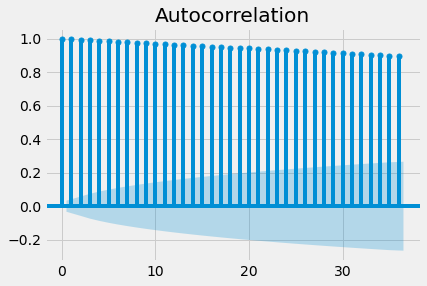

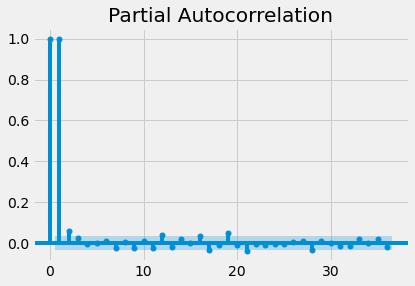

In [77]:
### ARIMA 모델의 p,d,q 확인하기

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_energy)
plot_pacf(df_energy)
plt.show()

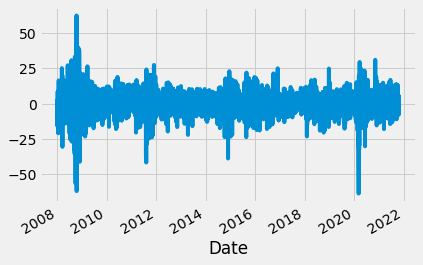

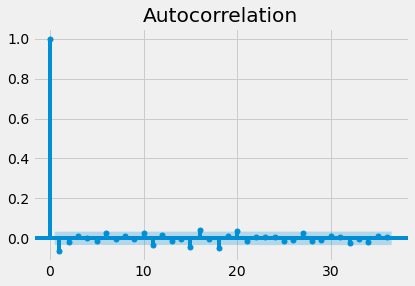

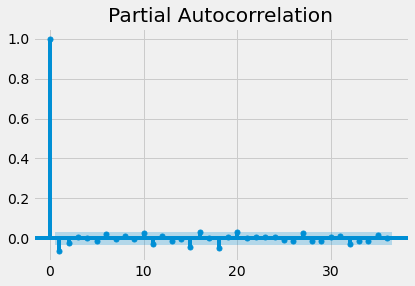

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df_energy.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [79]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_energy, order=(0,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=100)
print(model_fit.summary())

C:\Users\YoungMin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YoungMin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 3482
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -12219.723
Method:                       css-mle   S.D. of innovations              8.089
Date:                Mon, 08 Nov 2021   AIC                          24447.446
Time:                        16:53:55   BIC                          24472.068
Sample:                             1   HQIC                         24456.236
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0463      0.126     -0.367      0.713      -0.294       0.201
ma.L1.D.Price    -0.0628      0.017     -3.706      0.000      -0.096      -0.030
ma.L2.D.Price    -0.0165      0.017     

predicted=363.752202, expected=361.800000


C:\Users\YoungMin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=361.877657, expected=357.110000
predicted=357.375157, expected=357.550000
predicted=357.547803, expected=357.390000
predicted=357.324848, expected=367.900000
predicted=367.158380, expected=362.200000
predicted=362.266892, expected=376.020000
predicted=375.149110, expected=372.040000
predicted=371.949166, expected=369.230000
predicted=369.387681, expected=358.000000
predicted=358.705955, expected=359.340000
predicted=359.413585, expected=370.710000
predicted=369.903933, expected=383.350000
predicted=382.237110, expected=386.570000
predicted=386.006111, expected=399.830000
predicted=398.828055, expected=401.670000
predicted=401.212234, expected=401.660000
predicted=401.527544, expected=395.880000
predicted=396.168181, expected=408.940000
predicted=408.163143, expected=415.600000
predicted=414.871370, expected=418.000000
predicted=417.630646, expected=413.600000
predicted=413.747592, expected=416.450000
predicted=416.289593, expected=429.460000
predicted=428.537859, expected=427

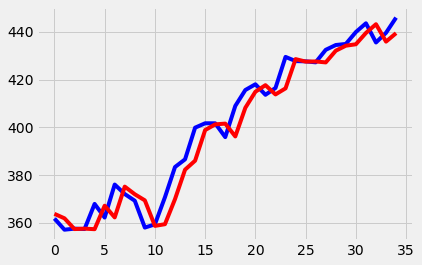

In [80]:
import matplotlib.pyplot as plt

### ARIMA 모형으로 TRAIN과 PREDICTION 시각화.

X = df_energy.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
me = 0
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    me += abs(yhat - obs)
# evaluate forecasts
me =  me/len(test)
print('Test ME: %.3f' % me)
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()

C:\Users\YoungMin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YoungMin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is 

predicted=363.752202, expected=361.800000
predicted=363.705678, expected=357.110000
predicted=363.635222, expected=357.550000
predicted=363.564764, expected=357.390000
predicted=363.494307, expected=367.900000
predicted=363.423854, expected=362.200000
predicted=363.353398, expected=376.020000
predicted=363.282947, expected=372.040000
predicted=363.212491, expected=369.230000
predicted=363.142035, expected=358.000000
predicted=363.071579, expected=359.340000
predicted=363.001127, expected=370.710000
predicted=362.930675, expected=383.350000
predicted=362.860221, expected=386.570000
predicted=362.789767, expected=399.830000
predicted=362.719312, expected=401.670000
predicted=362.648858, expected=401.660000
predicted=362.578401, expected=395.880000
predicted=362.507947, expected=408.940000
predicted=362.437493, expected=415.600000
predicted=362.367035, expected=418.000000
predicted=362.296580, expected=413.600000
predicted=362.226124, expected=416.450000
predicted=362.155670, expected=429

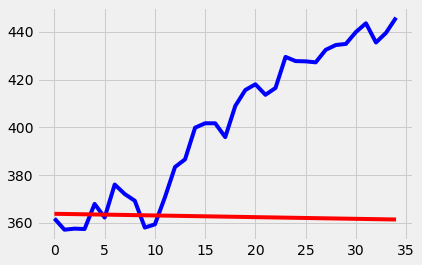

In [81]:
### 위 코드와는 다르게도 시도.

X = df_energy.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
me = 0
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    me += abs(yhat - obs)
# evaluate forecasts
me =  me/len(test)
print('Test RMSE: %.3f' % me)
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()

In [89]:
# 수익률 계산
def return_cal(x,y):
    buy = 0
    n = 0
    for t in range(len(x)-1):
        today = x[t]
        predict = y[t+1]
        if predict > today:
            n+=1
            buy += today
        final_price = x[t]

    aver_purch = buy/n
    r_rate = ((final_price - aver_purch)/aver_purch)*100
    print(aver_purch, final_price)
    print('최종 수익률: %.3f' % r_rate)

In [96]:
return_cal(ytest1,yhat1)
return_cal(ytest2,yhat2)
return_cal(ytest3,yhat3)
return_cal(ytest4,yhat4)
# return_cal(obs, yhat)

[0.44312901] [0.31183703]
최종 수익률: -29.628
[0.16583025] [0.18804631]
최종 수익률: 13.397
[0.14011279] [0.19405905]
최종 수익률: 38.502
[0.34213482] [0.96359658]
최종 수익률: 181.642


In [ ]:
# 3분할을 다른 방법으로 접근해야 할듯 (시간 구간 별로 다시 계산)